## Image posterization effect using unsupervised classification algorithms

In [27]:
import numpy  as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from PIL import Image 

Text(0.5, 1.0, 'Input image')

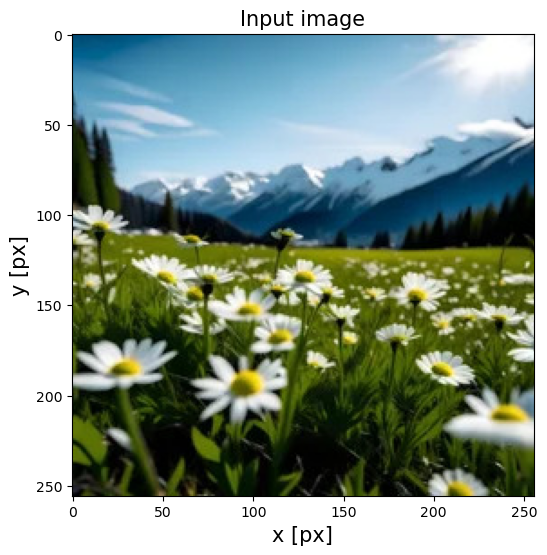

In [ ]:
# image = Image.open("bloom.jpg")
image = Image.open("m.jpg") # source: https://stablecog.com/gallery/o/d7317e15-f76c-40a2-9d34-2e1d885b99d7

plt.figure(figsize=(6,6))
plt.imshow(image)
plt.xlabel('x [px]', fontsize=15)
plt.ylabel('y [px]', fontsize=15)
plt.title('Input image', fontsize=15)

In [29]:
x, y = np.meshgrid(np.arange(image.size[0]), np.arange(image.size[1]))
x_flat, y_flat = x.ravel(), y.ravel()

r, g, b = image.split()
r, g, b = np.array(r), np.array(g), np.array(b)

image_df = pd.DataFrame({
    'x_indices': x_flat,
    'y_indices': y_flat,
    'vec_red': r[y_flat, x_flat],
    'vec_green': g[y_flat, x_flat],
    'vec_blue': b[y_flat, x_flat],
})

data = image_df.to_numpy()

image_df

,x_indices,y_indices,vec_red,vec_green,vec_blue
0,0,0,0,70,114
1,1,0,0,70,114
2,2,0,0,70,114
3,3,0,0,70,114
4,4,0,0,71,115
...,...,...,...,...,...
65531,251,255,43,64,8
65532,252,255,16,33,1
65533,253,255,4,19,0
65534,254,255,13,29,2


In [30]:
def plot_inertia(data):
    k_values            = []
    inertia_scores_vec = []

    for k in range(2,15):
        clusterer = KMeans(n_clusters=k)
        clusterer.fit(data)
        inertia_scores_vec.append(clusterer.inertia_)
        k_values.append(k)

    fig = plt.figure(figsize=(15,8))
    plt.plot(k_values, inertia_scores_vec, marker='o', c='darkblue')
    plt.grid()

    ax1 = plt.gca()
    ax2 = ax1.twinx()
    module_of_second_derivative = np.abs(np.diff(np.diff(inertia_scores_vec)))
    ax2.plot(k_values[1:-1], module_of_second_derivative, marker='o',color='red')

    ax1.set_xlabel('number of clusters', fontsize=15)
    ax1.set_ylabel('inertia', color='darkblue', fontsize=15)
    ax2.set_ylabel('inertia\'s second derivative',color='red', fontsize=15)

In [31]:
data_rgb = data[:, 2:]

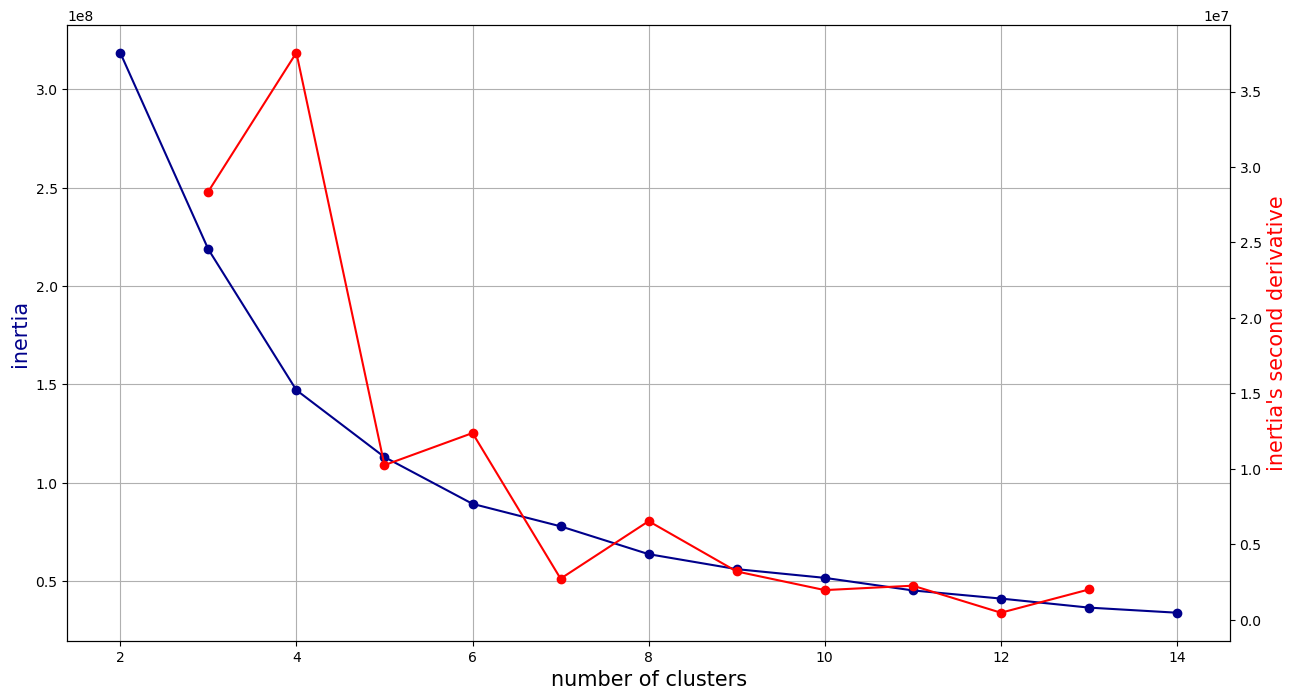

In [32]:
plot_inertia(data_rgb)

(256, 256, 3)


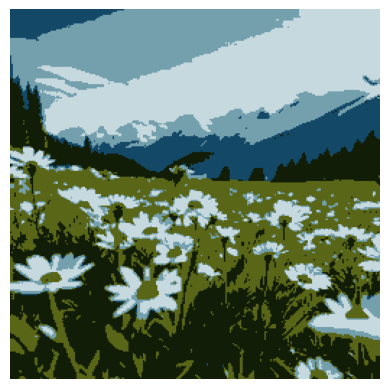

In [35]:
out_image = np.zeros((image.size[1], image.size[0], 3))
print(out_image.shape)

k = 5
clusterer = KMeans(n_clusters=k)
clusterer.fit(data_rgb)
k_means_predictions = clusterer.predict(data_rgb)

for val in np.unique(k_means_predictions):
    mask = k_means_predictions==val
    temp = image_df.iloc[mask, :].to_numpy()
    mean_color = np.mean(temp[:, 2:5], axis=0)
    for x, y in temp[:, :2].astype(int):
        out_image[y, x] = mean_color

out_image = np.clip(out_image, 0, 255).astype(np.uint8)
plt.imshow(out_image)
plt.axis('off')
plt.show()